In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
pd.set_option('display.max_rows', None)

In [197]:
scenario_50v_30ad_1 = pd.read_csv("CollisionScenarioData/200v_30pc/200v_30pc_1.txt")
scenario_50v_30ad_2 = pd.read_csv("CollisionScenarioData/200v_30pc/200v_30pc_2.txt")
scenario_50v_30ad_3 = pd.read_csv("CollisionScenarioData/200v_30pc/200v_30pc_3.txt")
scenario_50v_30ad_4 = pd.read_csv("CollisionScenarioData/200v_30pc/200v_30pc_4.txt")
scenario_50v_30ad_5 = pd.read_csv("CollisionScenarioData/200v_30pc/200v_30pc_5.txt")

In [198]:
intersections = pd.read_csv("intersections_new_1.csv")

In [199]:
number_of_vehicles = 200
average_df = pd.concat([scenario_50v_30ad_1.tail(number_of_vehicles), scenario_50v_30ad_2.tail(number_of_vehicles), scenario_50v_30ad_3.tail(number_of_vehicles), scenario_50v_30ad_4.tail(number_of_vehicles), scenario_50v_30ad_5.tail(number_of_vehicles)]).groupby(['zAxisPos','xAxisPos']).mean()


In [200]:
average_df = average_df.reset_index()
average_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   zAxisPos                  1000 non-null   float64
 1   xAxisPos                  1000 non-null   float64
 2   AgentID                   1000 non-null   int64  
 3   collisions                1000 non-null   int64  
 4   topSpeed(mph)             1000 non-null   float64
 5   currentSpeed(mph)         1000 non-null   float64
 6   distanceOfTravel(meters)  1000 non-null   float64
 7   raycastLength             1000 non-null   int64  
 8   tractionControl           1000 non-null   int64  
 9   VelocityMagnitude(BETA)   1000 non-null   float64
 10  VehicleMass               1000 non-null   int64  
 11  Downforce                 1000 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 93.9 KB


In [201]:
#average_df = average_df[(average_df[['collisions']] != 0).all(axis=1)]

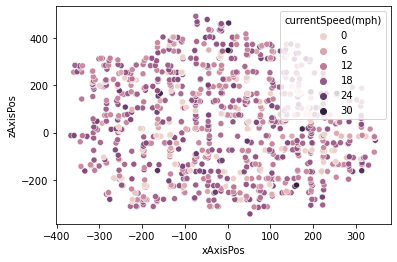

In [202]:
sb.scatterplot(data=average_df, x="xAxisPos", y="zAxisPos", hue="currentSpeed(mph)")

In [203]:
intersections = intersections.drop_duplicates()

In [204]:
intersections.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 0 to 354
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   xAxis   355 non-null    float64
 1   yAxis   355 non-null    float64
 2   zAxis   355 non-null    float64
dtypes: float64(3)
memory usage: 11.1 KB


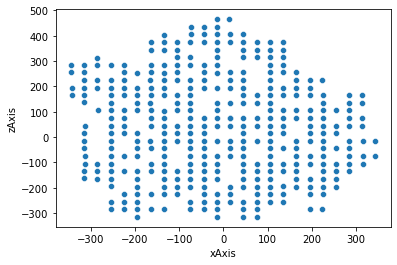

In [205]:
sb.scatterplot(data=intersections, x="xAxis", y="zAxis")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


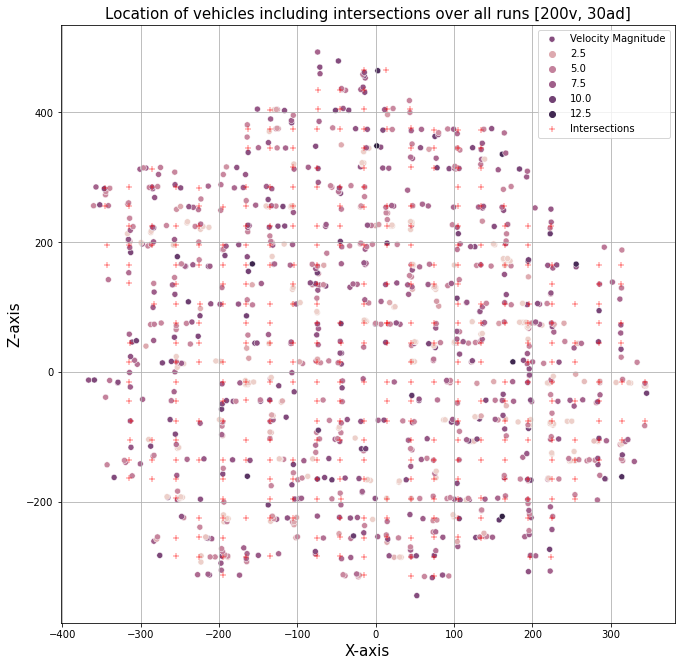

In [206]:
# collision locations for all runs including location of vehicles at end of simulation including intersection locations.
average_df.to_csv(r'200v_30_ad.csv', index = False)

a4_dims = (11, 11)
fig, ax = plt.subplots(figsize=a4_dims)
ax.grid()
sb.scatterplot(data=average_df, x="xAxisPos", y="zAxisPos", ax=ax, hue='VelocityMagnitude(BETA)', label = 'Velocity Magnitude')
sb.scatterplot(data=intersections, x="xAxis", y="zAxis", ax=ax, marker="+", color="red", label = 'Intersections')
leg1 = ax.legend(loc='center left')
leg2 = ax.legend()
ax.axes.set_title("Location of vehicles including intersections over all runs [200v, 30ad]",fontsize=15)
ax.set_xlabel("X-axis",fontsize=15)
ax.set_ylabel("Z-axis",fontsize=15)


plt.savefig('200-30ad_test.eps', format='eps')